In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Eads_df = pd.read_csv('A1_E_ads.csv')
first_col = list(Eads_df.iloc[:,0])

Eads_df = Eads_df.set_index('Arrangements')


In [3]:
## when passing in alloying elements, the order MUST be the same given in the database_elements!!!
database_elements = ['Ni','Cr','Fe','Mo','W','Al','Mn','Cu']

## Test alloy A1
alloy_composition = {'Ni': 0.51, 'Cr': 0.21, 'Fe':0.20 ,'Mo': 0.06, 'W': 0.02}

## this block of code enumerates all elemental arrangements and computes their associated probabilities
ele_list = []
conc_list = []

for ele, conc in alloy_composition.items():
    ele_list.append(ele)
    conc_list.append(conc)

one = []
one_prob_list = []
two = []
two_prob_list = []
three = []
three_prob_list = []
position_index = list(range(len(ele_list)))


for i in ele_list:
    one.append(i+i+i)

one_prob_list = [n**3 for n in conc_list]



for i in ele_list:
    for j in ele_list:
        if i == j:
            continue
        else:
            two.append(i+i+j)
            two_prob_list.append(alloy_composition[i] * alloy_composition[i] * alloy_composition[j]*3 )       

            
for i in position_index:
    for j in position_index:
        if j <= i:
            continue
        for k in position_index:
            if k <= j:
                continue
            else:
                three.append(ele_list[i] + ele_list[j] + ele_list[k])
                three_prob_list.append(conc_list[i]*conc_list[j]*conc_list[k]*6)


total_arrangements = one + two + three
total_prob = one_prob_list + two_prob_list + three_prob_list
# Sanity check: total probability sums up to unity
print(total_arrangements)
print(total_prob)

['NiNiNi', 'CrCrCr', 'FeFeFe', 'MoMoMo', 'WWW', 'NiNiCr', 'NiNiFe', 'NiNiMo', 'NiNiW', 'CrCrNi', 'CrCrFe', 'CrCrMo', 'CrCrW', 'FeFeNi', 'FeFeCr', 'FeFeMo', 'FeFeW', 'MoMoNi', 'MoMoCr', 'MoMoFe', 'MoMoW', 'WWNi', 'WWCr', 'WWFe', 'WWMo', 'NiCrFe', 'NiCrMo', 'NiCrW', 'NiFeMo', 'NiFeW', 'NiMoW', 'CrFeMo', 'CrFeW', 'CrMoW', 'FeMoW']
[0.13265100000000002, 0.009260999999999998, 0.008000000000000002, 0.00021599999999999996, 8.000000000000001e-06, 0.16386299999999998, 0.15606, 0.046818, 0.015606, 0.06747299999999999, 0.026459999999999997, 0.007937999999999999, 0.0026459999999999995, 0.06120000000000002, 0.025200000000000004, 0.007200000000000001, 0.0024000000000000002, 0.005508, 0.002268, 0.00216, 0.000216, 0.0006120000000000001, 0.000252, 0.00024000000000000003, 7.2e-05, 0.12852000000000002, 0.03855599999999999, 0.012852000000000002, 0.03672, 0.012240000000000001, 0.003672, 0.015120000000000001, 0.00504, 0.0015119999999999997, 0.00144]


In [4]:
def CompetitiveAdsorption(Evec,U,pH,Cl,T):
    '''Only Difference from the MatLab function is 
    in that probability of elemental arrangements is taken into account at the end'''
    
    # Zero Point Energies (eV)
    ZPE_W =  0.63
    ZPE_Cl2 = 0.04
    ZPE_H2 = 0.29

    ZPE_W = 0.00 - ZPE_W
    ZPE_OH = 0.00 - ZPE_W - ZPE_H2/2
    ZPE_O = 0.00 - ZPE_W - ZPE_H2
    ZPE_Cl = 0.00 - ZPE_Cl2/2 
    ZPE_H = 0.00 - ZPE_H2/2

    # Integrated heat capacity (eV)
    Cp_W = 0.10
    Cp_Cl2 = 0.10
    Cp_H2 = 0.09

    # Entropy at 298.15K (eV/K)
    S_W = 1.96E-3
    S_Cl2 = 2.31E-3
    S_H2 = 1.36E-3
    
    # Reference potentials
    U0_H2 = 0.00
    U0_Cl = 1.36
    
    # Evec is the adsorption energy vector associated with A particular arrangement (e.g. NiNiNi)
    E_O = Evec[0]
    E_Cl = Evec[1]
    E_OH = Evec[2]
    E_W = Evec[3]
    E_H = Evec[4]
    probability = Evec[5] #arrangements probabilities are stored in the 6th column of later defined array_temp
    
    G_W = E_W + ZPE_W - Cp_W + T * S_W
    G_OH = E_OH + ZPE_OH - (Cp_W - Cp_H2/2) + T * (S_W - S_H2/2)
    G_O = E_O + ZPE_O - (Cp_W - Cp_H2) + T *(S_W - S_H2)
    G_Cl = E_Cl + ZPE_Cl - Cp_Cl2/2 + T * S_Cl2/2
    G_H = E_H + ZPE_H - Cp_H2/2 + T * S_H2/2 
    
    R = 8.617E-5
    K_W = np.exp(-G_W/R/T)
    K_OH = np.exp(-G_OH/R/T)
    K_O = np.exp(-G_O/R/T)
    K_Cl = np.exp(-G_Cl/R/T)
    K_H = np.exp(-G_H/R/T)
    
    C_H = 10**(-pH) # compute activity of [H+], given the pH
    
    # matrix A dot Theta = C
    # Solve for Theta
    
    A = np.array([[C_H**2*np.exp(-2*(U-U0_H2)/R/T),0,0,0,0,-K_O],
        [0,np.exp(-(U-U0_Cl)/R/T),0,0,0,-K_Cl*Cl],
        [0,0,np.exp(-(U-U0_H2)/R/T)*C_H,0,0,-K_OH],
        [0,0,0,1,0,-K_W],
        [0,0,0,0,1,-K_H*C_H*np.exp(-(U-U0_H2)/R/T)],
        [1,1,1,1,1,1]])
    
    C = np.array([[0],
                  [0],
                 [0],
                 [0],
                 [0],
                 [1]])

    Theta_tmp = np.linalg.solve(A, C)
    Theta = Theta_tmp * probability 
    return Theta

In [5]:
arrangement_to_prob = dict(zip(total_arrangements,total_prob))
df_temp_probability = pd.DataFrame.from_dict(arrangement_to_prob,orient='index',columns=['probabilities'])

#df_temp_probability.loc['NiNiNi']

temp_Eads = {} 

for i in total_arrangements:
    if i in first_col:
        temp_Eads.update({i : Eads_df.loc[i]})
    else:
        print(f'{i} is missing from the Eads_df database')

#print(temp)
# Convert {temp} into DataFrame    
df_temp_Eads = pd.DataFrame.from_dict(temp_Eads, orient='index')


# Concatenate Eads dataframe with probabilities dataframe
df_temp = pd.concat([df_temp_Eads,df_temp_probability],axis=1)
print(df_temp)
# Convert dataframe into numpy array for numerical computations
array_temp = df_temp.to_numpy()
#print(array_temp)

        E_ads_O  E_ads_Cl  E_ads_OH  E_ads_H2O   E_ads_H  probabilities
NiNiNi  0.26066  -2.10639  -0.03994       -0.6 -0.497683       0.132651
CrCrCr -1.92860  -3.16845  -1.78870       -0.6 -1.071506       0.009261
FeFeFe -0.63995  -2.47865  -0.78890       -0.6 -0.589511       0.008000
MoMoMo -1.27180  -2.71085  -1.16240       -0.6 -0.713650       0.000216
WWW    -1.30860  -3.04555  -1.18875       -0.6  2.863061       0.000008
NiNiCr -1.11430  -2.40735  -0.56600       -0.6 -0.635938       0.163863
NiNiFe -0.15740  -2.25745  -0.31300       -0.6 -0.597641       0.156060
NiNiMo -0.41350  -1.99185  -0.19640       -0.6 -0.530208       0.046818
NiNiW  -0.79300  -2.08145  -0.43540       -0.6 -0.463177       0.015606
CrCrNi -1.03710  -2.59665  -1.02660       -0.6 -0.630884       0.067473
CrCrFe -1.57805  -2.79765  -1.58690       -0.6 -0.695300       0.026460
CrCrMo -1.72830  -2.95965  -1.47000       -0.6 -0.834793       0.007938
CrCrW  -1.60580  -2.64815  -1.26690       -0.6 -0.794596       0

In [6]:
potential = np.linspace(-1,1,100)
sz = np.size(potential)
theta_tmp = np.zeros((6,sz))

for i,u in np.ndenumerate(potential):
    for row in array_temp:
        tmp = CompetitiveAdsorption(Evec=row,U=u,pH=1,Cl=1,T=298)
        theta_tmp[:,i] = theta_tmp[:,i] + tmp
#print(theta_tmp)

cov_O = theta_tmp[0,:]
cov_Cl = theta_tmp[1,:]
cov_OH = theta_tmp[2,:]
cov_W = theta_tmp[3,:]
cov_H = theta_tmp[4,:]
cov_M = theta_tmp[5,:]

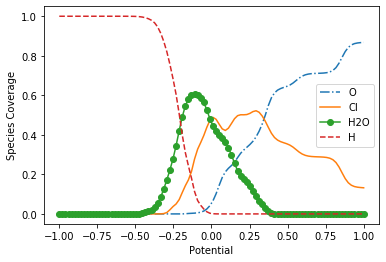

In [7]:
plt.plot(potential,cov_O,'-.',label='O')
plt.plot(potential,cov_Cl,'-',label='Cl')
#plt.plot(potential,cov_OH,label='OH')
plt.plot(potential,cov_W,'o-',label='H2O')
plt.plot(potential,cov_H,'--',label='H')
#plt.plot(potential,cov_M,label='Bare Metal')
plt.legend()
plt.xlabel('Potential')
plt.ylabel('Species Coverage')
plt.show()